In [1]:
pylab inline

/Library/Python/2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [16]:
try:
    reload(dc)
    print  'dc reloaded'
except Exception:
    print 'dc not loaded yet'
    

dc reloaded


In [17]:
WORDSIZE = 32
import dnnConnectivityAndMemoryAllocation as dc
import numpy as np

# Create memory
memory = dc.Memory(2,32,8,4096)

# Create DNN
network = dc.Network()
#                                    X    Y    Z    Kx   Ky   Kz   stride
#network.addLayer('Input',          224, 224,    3                      ) #    3 
#network.addLayer('Convolutional',   55,  55,   96,   11,  11,    3,   4 ) #   96,
#network.addLayer('Convolutional',   27,  27,  256,    5,   5,   96,   2 ) #  256,
# network.addLayer('Convolutional',   13,  13,  384,    3,   3,  256,   2 ) #  384,
# network.addLayer('Convolutional',   13,  13,  384,    3,   3,  384,   1 ) #  384,
# network.addLayer('Fully Connected', 13,  13,  256,    3,   3,  384,   1 ) #  256,
# network.addLayer('Fully Connected',  1,   1, 4096,   13,  13,  256,   1 ) # 4096,
# network.addLayer('Fully Connected',  1,   1, 4096,    1,   1, 4096,   1 ) # 4096,
# network.addLayer('Fully Connected',  1,   1, 1024,    1,   1, 4096,   1 ) # 1024,

#network.addLayer('Input',          224, 224,    3                      ) #    3 
#network.addLayer('Convolutional',   55,  55,   10,   11,  11,    3,   4 ) #   96,
network.addLayer('Input',           55,  55,    3,                      ) #   96,
network.addLayer('Convolutional',   27,  27,    5,    5,   5,    3,   2 ) #  256,
network.addLayer('Convolutional',   13,  13,   10,    3,   3,    5,   2 ) #  384,
#network.addLayer('Convolutional',   13,  13,    8,    3,   3,   10,   1 ) #  384,
#network.addLayer('Fully Connected', 13,  13,    6,    3,   3,    8,   1 ) #  256,
#network.addLayer('Fully Connected',  1,   1,    6,   13,  13,    6,   1 ) # 4096,
#network.addLayer('Fully Connected',  1,   1,    4,    1,   1,    6,   1 ) # 4096,
#network.addLayer('Fully Connected',  1,   1,    4,    1,   1,    4,   1 ) # 1024,

network.assignPEs()






Layer  0  left Kernel offset is  0 , top Kernel offset is  0
Layer  1  left Kernel offset is  -1 , top Kernel offset is  -1
Layer  2  left Kernel offset is  0 , top Kernel offset is  0


In [18]:
for l in range(1, network.numberOfLayers):
  network.Layers[l].generateConnections()


Updating Layer 1 connections for features in row :0
Updating Layer 1 connections for features in row :1
Updating Layer 1 connections for features in row :2
Updating Layer 1 connections for features in row :3
Updating Layer 1 connections for features in row :4
Updating Layer 1 connections for features in row :5
Updating Layer 1 connections for features in row :6
Updating Layer 1 connections for features in row :7
Updating Layer 1 connections for features in row :8
Updating Layer 1 connections for features in row :9
Updating Layer 1 connections for features in row :10
Updating Layer 1 connections for features in row :11
Updating Layer 1 connections for features in row :12
Updating Layer 1 connections for features in row :13
Updating Layer 1 connections for features in row :14
Updating Layer 1 connections for features in row :15
Updating Layer 1 connections for features in row :16
Updating Layer 1 connections for features in row :17
Updating Layer 1 connections for features in row :18
Upd

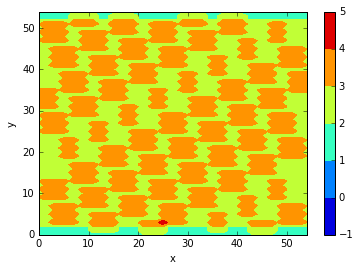

In [19]:
network.Layers[0].displayTargetPECounts()


In [20]:
lid = 0
numOfPEs = network.Layers[lid].getTargetPECounts()



In [21]:
opt = np.get_printoptions()
np.set_printoptions(threshold=np.inf)
print numOfPEs
np.set_printoptions(threshold=1000)


[[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1
   1 1 1 1 1 1 1 2 2 2 2 2 1 1 1 1 1 1 1]
  [2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 2 2 2 2 2 3 3 3 3 3 2 2 2 2 2 2 2 2 2 3
   3 3 2 2 2 2 2 3 3 3 3 3 2 2 2 2 2 2 2]
  [2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 2 2 2 2 2 3 3 3 3 3 2 2 2 2 2 2 2 2 2 3
   3 3 2 2 2 2 2 3 3 3 3 3 2 2 2 2 2 2 2]
  [3 3 3 4 4 4 4 4 3 3 3 4 4 4 4 4 3 3 3 3 3 4 4 4 4 5 4 4 4 4 3 3 3 3 3 4
   4 4 3 3 3 3 3 4 4 4 4 4 3 4 4 4 4 4 3]
  [2 2 2 3 3 3 3 3 2 2 2 3 3 3 3 3 2 2 2 2 2 2 2 2 2 3 3 3 3 3 2 2 2 2 2 3
   3 3 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 2]
  [3 3 3 4 4 4 4 4 3 3 3 4 4 4 4 4 3 4 4 4 4 4 3 3 3 4 4 4 4 4 3 3 3 3 3 4
   4 4 3 3 3 4 4 4 3 3 3 3 3 4 4 4 4 4 3]
  [2 2 2 3 3 3 3 3 2 2 2 2 2 2 2 2 2 3 3 3 3 3 2 2 2 3 3 3 3 3 2 2 2 2 2 2
   2 2 2 2 2 3 3 3 2 2 2 2 2 3 3 3 3 3 2]
  [3 3 3 4 4 4 4 4 3 4 4 4 4 4 3 3 3 4 4 4 4 4 3 3 3 4 4 4 4 4 3 4 4 4 4 4
   3 3 3 3 3 4 4 4 3 3 3 3 3 4 4 4 4 4 3]
  [2 2 2 2 2 2 2 2 2 3 3 3 3 3 2 2 2 3 3 3 3 3 2 2 2 2 2 2 2 2 2

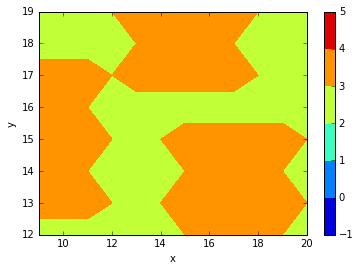

In [22]:
#region = np.array([50,65,45,65])
region = np.array([12,20,9,21])
network.Layers[0].displayTargetPECountsRegion(region)

In [26]:
for layerID in range(1,network.numberOfLayers):
  for peY in range(network.peY) :
    for peX in range(network.peX) :
      nv = network.peArray.pe[peY][peX].findROI(layerID)
      network.managerArray.manager[peY][peX].memCpyROI(layerID)


In [27]:
layerID = 1
network.managerArray.manager[0][0].allocateMemory(memory,layerID)
for y in range(network.managerArray.manager[0][0].roiCells[layerID][0].__len__()):
  for x in range(network.managerArray.manager[0][0].roiCells[layerID][0][0].__len__()):
    for z in range(network.managerArray.manager[0][0].roiCells[layerID].__len__()):
        print network.managerArray.manager[0][0].roiCells[layerID][z][y][x]



Cell:0,0,0                                               
Layer:0                                                      
PE{Y,X} : 0,0                                            
Memory:{Ch, Bank, Page, Word}:0,0,0,0                
roi || roiFromSrcCells(findROI()) coords : [0 0 0] [0 0 0] || [0 0 0],[0 0 0]  
Methods: ['findROI', 'getROI']                                                   
Fields: ['roi', 'copiedTo', 'kernel', 'memoryLocation', 'layerID', 'Y', 'X', 'Z', 'originalCell', 'roiFromSrcCells', 'targetCells', 'parentLayer', 'targetPEs', 'sourcePEs', 'PE', 'sourceCells']                                                    

Cell:1,0,0                                               
Layer:0                                                      
PE{Y,X} : 0,0                                            
Memory:{Ch, Bank, Page, Word}:1,0,0,0                
roi || roiFromSrcCells(findROI()) coords : [0 0 0] [0 0 0] || [0 0 0],[0 0 0]  
Methods: ['findROI', 'getROI']                

In [38]:
pLine = ''
for layerID in range(0,network.numberOfLayers):
    for y in range(network.peY) :
        for x in range(network.peX) :
            #print network.managerArray.manager[y][x]
            #print network.managerArray.manager[y][x].pe
            pLine = pLine + '{0:5}'.format(str(network.managerArray.manager[y][x].pe.cellsProcessed[layerID].__len__()))
            #for c in network.managerArray.manager[y][x].pe.cellsProcessed[layerID] : 
            #    nv = c.findROI()
            #    print c
        pLine = pLine + '\n'
    pLine = pLine + '\n\n'
print pLine

141  141  141  141  141  141  141  141  
141  141  141  141  141  142  142  142  
142  142  142  142  142  142  142  142  
142  142  142  142  142  142  142  142  
142  142  142  142  142  142  142  142  
142  142  142  142  142  142  142  142  
142  142  142  142  142  142  142  142  
142  142  142  142  142  142  142  142  


56   56   56   57   57   57   57   57   
57   57   57   57   57   57   57   57   
57   57   57   57   57   57   57   57   
57   57   57   57   57   57   57   57   
57   57   57   57   57   57   57   57   
57   57   57   57   57   57   57   57   
57   57   57   57   57   57   57   57   
57   57   57   57   57   57   57   57   


26   26   26   26   26   26   26   26   
26   26   26   26   26   26   26   26   
26   26   26   26   26   26   26   26   
26   26   26   26   26   26   26   26   
26   26   26   26   26   26   27   27   
27   27   27   27   27   27   27   27   
27   27   27   27   27   27   27   27   
27   27   27   27   27   27   27   27   



